In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

n_rows_to_load = 1000000

In [2]:
hist_transactions = pd.read_csv("data/historical_transactions.csv", index_col='card_id', nrows=n_rows_to_load)
merchants = pd.read_csv("data/merchants.csv", index_col='merchant_id', nrows=n_rows_to_load)
train_df = pd.read_csv("data/train.csv", index_col='card_id', nrows=n_rows_to_load)

FileNotFoundError: File b'data/historical_transactions.csv' does not exist

In [1]:
hist_train = hist_transactions.join(
    train_df,
    how='inner',
    rsuffix='_train',
    lsuffix='_transac'
).drop_duplicates().reset_index(drop=True)

NameError: name 'hist_transactions' is not defined

In [ ]:
hist_train = hist_train.reset_index()
hist_train = hist_train.set_index('merchant_id')

In [ ]:
hist_train_merch = hist_train.join(
    merchants,
    how='inner',
    rsuffix='_merchant'
)
hist_train_merch = hist_train_merch.reset_index()

In [ ]:
cont_cols = [
    'installments',
    'month_lag',
    'purchase_amount',
    'target',
    'numerical_1', 
    'numerical_2',
    'most_recent_sales_range', 
    'most_recent_purchases_range', 
    'avg_sales_lag3',
    'avg_purchases_lag3',
    'avg_purchases_lag6',
    'active_months_lag6',
    'avg_sales_lag6',
    'avg_purchases_lag12',
    'active_months_lag12',
    'avg_sales_lag12'
]

In [ ]:
df_cont

In [ ]:
df_cont_cols = hist_train_merch[cont_cols]

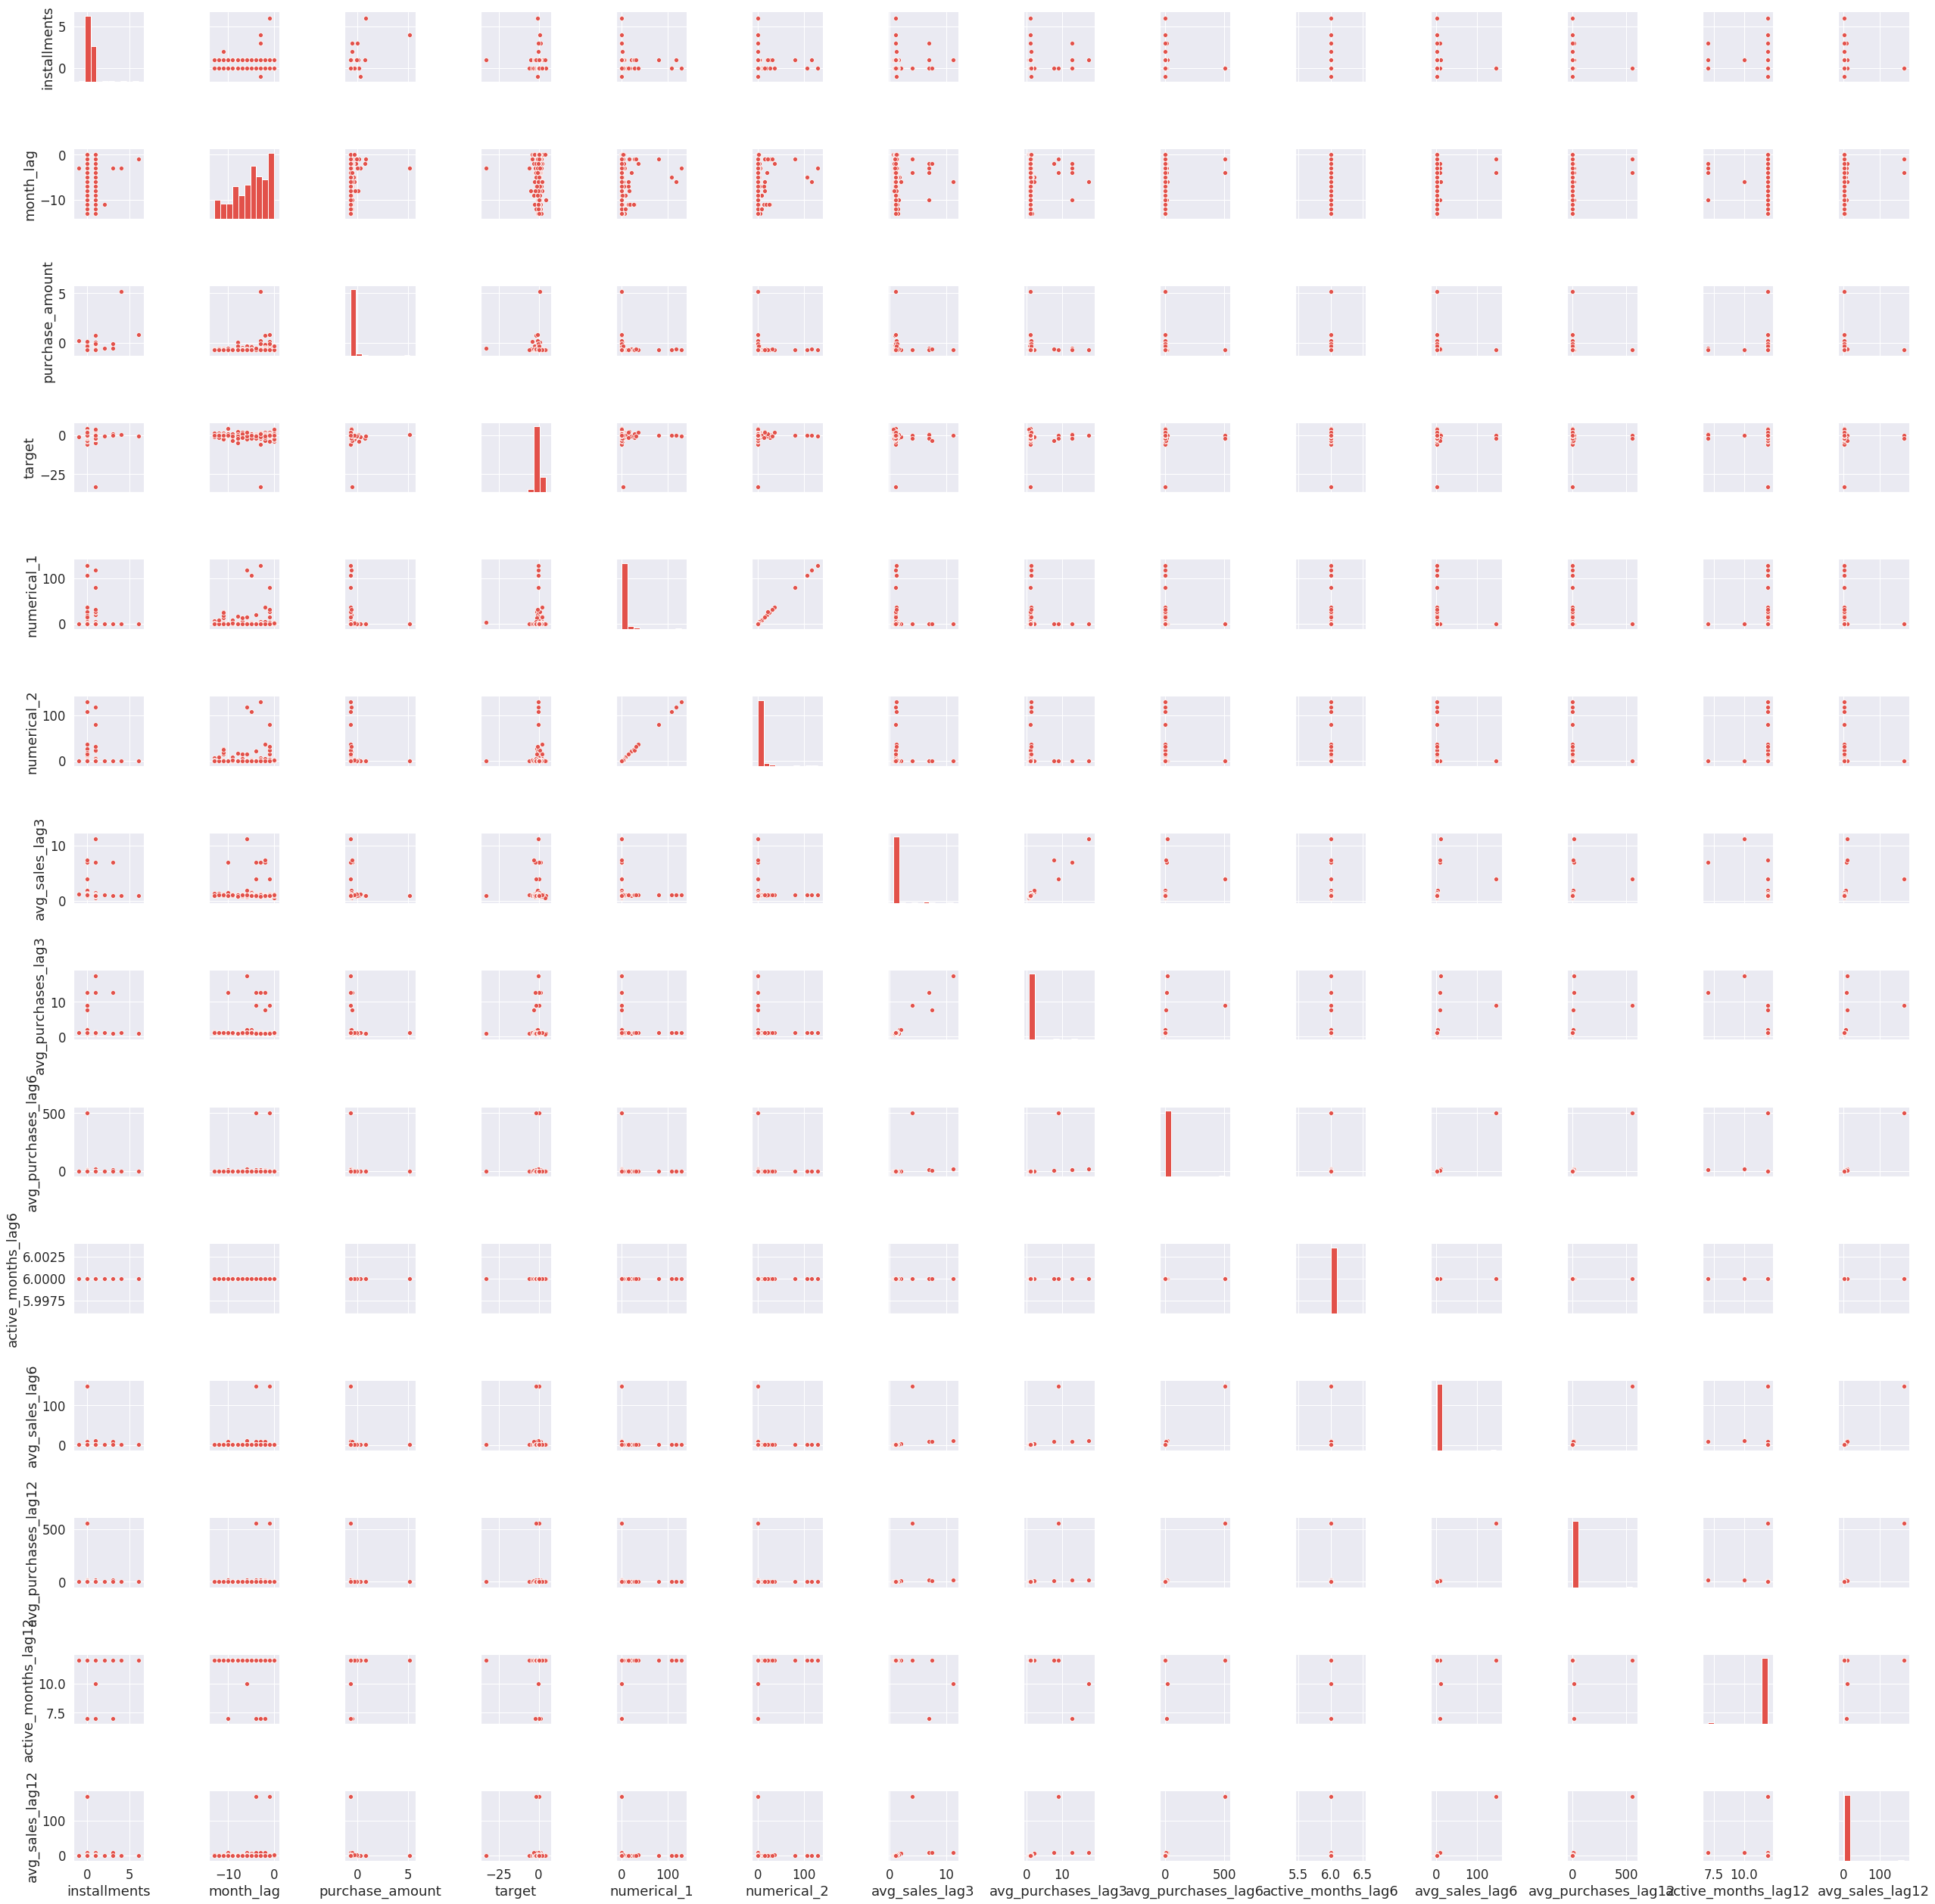

In [7]:
p = sns.pairplot(df_cont_cols.sample(200))

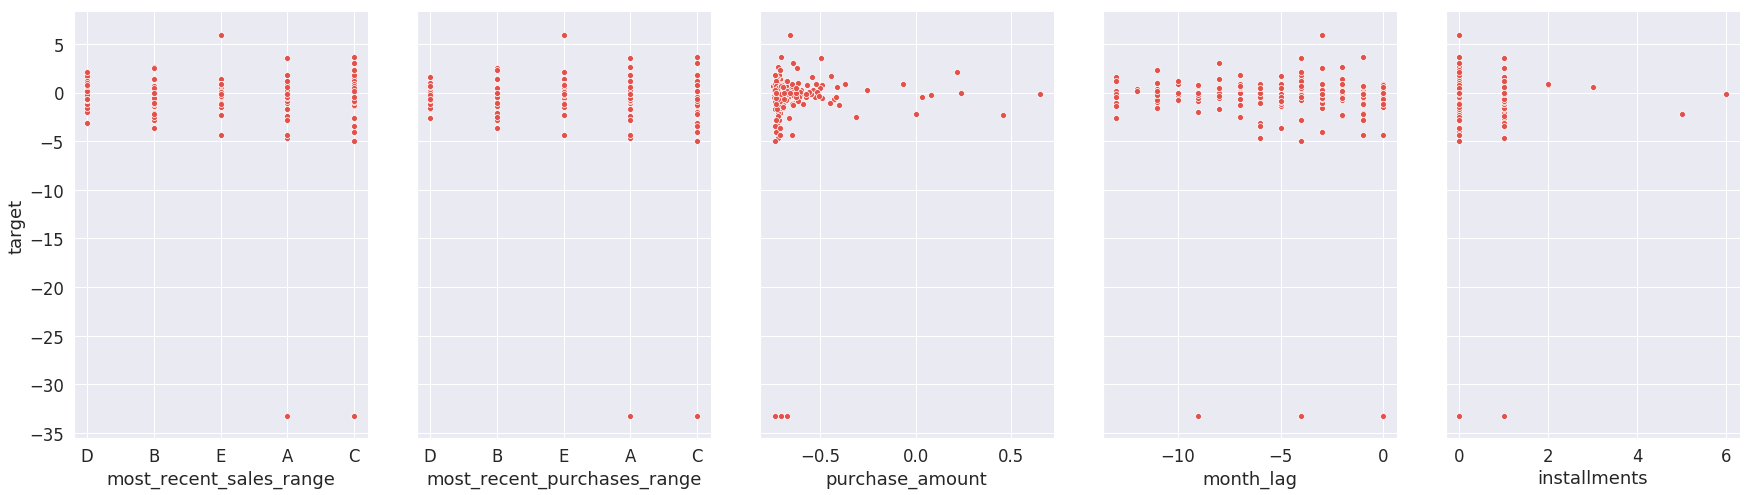

In [15]:
p = sns.pairplot(df_cont_cols.sample(200), x_vars=['most_recent_sales_range','most_recent_purchases_range','purchase_amount', 'month_lag', 'installments'], y_vars='target', size=7, aspect=0.7)